In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [28]:
df = pd.read_csv('../3d_matrix/3d_matrix_results.csv')
df.head()

,corr_matrix,n,contamination_level,ctam_sigma,cook_cutoff,robust_m_est_bias,robust_m_est_variance,robust_m_est_mse,robust_mm_est_bias,robust_mm_est_variance,...,ols_est_variance,ols_est_mse,ols_diag_est_bias,ols_diag_est_variance,ols_diag_est_mse,ols_mspe,robust_m_mspe,robust_mm_mspe,robust_s_mspe,ols_diag_mspe
0,"1,0.355078811291605,0.0163714978843927,0.35507...",50,0.0,1,4,0.000227,0.022715,0.022851,0.000220,0.022930,...,0.022008,0.022189,0.000252,0.030395,0.030525,1.084056,1.089832,1.089832,1.301018,1.115029
1,"1,0.355078811291605,0.0163714978843927,0.35507...",50,0.1,1,4,0.015751,0.040754,0.056342,0.002011,0.032934,...,0.085495,0.164730,0.005434,0.039497,0.044773,1.520000,1.175290,1.102006,1.285477,1.140813
2,"1,0.355078811291605,0.0163714978843927,0.35507...",50,0.2,1,4,0.076241,0.070236,0.146195,0.014467,0.058061,...,0.108100,0.342203,0.041020,0.068593,0.109339,2.123991,1.501135,1.265765,1.307840,1.404109
3,"1,0.355078811291605,0.0163714978843927,0.35507...",50,0.3,1,4,0.235597,0.112252,0.347400,0.071452,0.098782,...,0.130440,0.596450,0.148338,0.102233,0.250162,2.960242,2.162763,1.595443,1.366316,1.866701
4,"1,0.355078811291605,0.0163714978843927,0.35507...",50,0.4,1,4,0.444875,0.114005,0.558425,0.258745,0.133149,...,0.114745,0.748932,0.311191,0.120275,0.430985,3.418876,2.829964,2.294681,1.559848,2.468261


In [29]:
df['contamination_level'].unique()

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

In [30]:
df_contam4_n200 = df[(df['contamination_level'].isin([0,0.4])) & (df['n'] == 200)]
df_contam4_n200['corr_matrix'].nunique()

1000

In [31]:
df_contam4_n200.columns

Index(['corr_matrix', 'n', 'contamination_level', 'ctam_sigma', 'cook_cutoff',
       'robust_m_est_bias', 'robust_m_est_variance', 'robust_m_est_mse',
       'robust_mm_est_bias', 'robust_mm_est_variance', 'robust_mm_est_mse',
       'robust_s_est_bias', 'robust_s_est_variance', 'robust_s_est_mse',
       'ols_est_bias', 'ols_est_variance', 'ols_est_mse', 'ols_diag_est_bias',
       'ols_diag_est_variance', 'ols_diag_est_mse', 'ols_mspe',
       'robust_m_mspe', 'robust_mm_mspe', 'robust_s_mspe', 'ols_diag_mspe'],
      dtype='object')

In [32]:
feature_columns = ['corr_matrix', 'n', 'contamination_level', 'ctam_sigma', 'cook_cutoff']
mpse_columns = ['ols_mspe', 'robust_m_mspe', 'robust_mm_mspe', 'robust_s_mspe', 'ols_diag_mspe']
bias_columns = ['ols_est_bias', 'robust_m_est_bias', 'robust_mm_est_bias', 'robust_s_est_bias', 'ols_diag_est_bias']
variance_columns = ['ols_est_variance', 'robust_m_est_variance', 'robust_mm_est_variance', 'robust_s_est_variance', 'ols_diag_est_variance']
mse_columns = ['ols_est_mse', 'robust_m_est_mse', 'robust_mm_est_mse', 'robust_s_est_mse', 'ols_diag_est_mse']

In [33]:
# mspe degradation
df_contam4_n200_mspe = df_contam4_n200[feature_columns + mpse_columns]  
df_contam4_n200_mspe = df_contam4_n200_mspe.melt(id_vars=feature_columns, value_vars=mpse_columns, var_name='method', value_name='mspe')
df_contam4_n200_mspe['method'] = df_contam4_n200_mspe['method'].str.replace('_mspe', '')
df_contam4_n200_mspe.head()

,corr_matrix,n,contamination_level,ctam_sigma,cook_cutoff,method,mspe
0,"1,0.355078811291605,0.0163714978843927,0.35507...",200,0.0,1,4,ols,1.017878
1,"1,0.355078811291605,0.0163714978843927,0.35507...",200,0.4,1,4,ols,3.066830
2,"1,-0.458160213660449,-0.655413963831961,-0.458...",200,0.0,1,4,ols,1.012626
3,"1,-0.458160213660449,-0.655413963831961,-0.458...",200,0.4,1,4,ols,1.368751
4,"1,0.290518128778785,-0.365148370154202,0.29051...",200,0.0,1,4,ols,1.013631


In [34]:
test_string = '1,0.921930444426835,0.896438143216074,0.921930444426835,1,0.86281928839162,0.896438143216074,0.86281928839162,1'
def string_to_matrix(string):
    return np.array([float(x) for x in string.split(',')]).reshape(3,3)

string_to_matrix(test_string)

array([[1.        , 0.92193044, 0.89643814],
       [0.92193044, 1.        , 0.86281929],
       [0.89643814, 0.86281929, 1.        ]])

In [35]:
# now calculate the amount of degradation for each method, i.e. contam4 - contam0
df_contam4_n200_mspe = df_contam4_n200_mspe[df_contam4_n200_mspe['method'] == 'robust_s']


df_contam4_n200_mspe_contam0 = df_contam4_n200_mspe[df_contam4_n200_mspe['contamination_level'] == 0]
df_contam4_n200_mspe_contam4 = df_contam4_n200_mspe[df_contam4_n200_mspe['contamination_level'] == 0.4]

df_contam4_n200_mspe_contam0 = df_contam4_n200_mspe_contam0.rename(columns={'mspe': 'mspe_contam0'})
df_contam4_n200_mspe_contam4 = df_contam4_n200_mspe_contam4.rename(columns={'mspe': 'mspe_contam4'})

# merge the two dataframes
df_contam4_n200_mspe = pd.merge(df_contam4_n200_mspe_contam0, df_contam4_n200_mspe_contam4, on=['corr_matrix', 'method'])
df_contam4_n200_mspe['mspe_degradation'] = df_contam4_n200_mspe['mspe_contam4'] - df_contam4_n200_mspe['mspe_contam0']
df_contam4_n200_mspe.head()

,corr_matrix,n_x,contamination_level_x,ctam_sigma_x,cook_cutoff_x,method,mspe_contam0,n_y,contamination_level_y,ctam_sigma_y,cook_cutoff_y,mspe_contam4,mspe_degradation
0,"1,0.355078811291605,0.0163714978843927,0.35507...",200,0.0,1,4,robust_s,1.070243,200,0.4,1,4,1.082396,0.012154
1,"1,-0.458160213660449,-0.655413963831961,-0.458...",200,0.0,1,4,robust_s,1.071708,200,0.4,1,4,1.140897,0.069189
2,"1,0.290518128778785,-0.365148370154202,0.29051...",200,0.0,1,4,robust_s,1.068969,200,0.4,1,4,1.116035,0.047066
3,"1,0.244058551732451,-0.000312824733555317,0.24...",200,0.0,1,4,robust_s,1.066440,200,0.4,1,4,1.125415,0.058976
4,"1,-0.123121878132224,0.883049353957176,-0.1231...",200,0.0,1,4,robust_s,1.085090,200,0.4,1,4,1.102782,0.017693


In [43]:
top_5_degradation_mateix = df_contam4_n200_mspe.groupby(['corr_matrix'])['mspe_degradation'].mean().sort_values(ascending=False).head(5).index.tolist()
bottom_5_degradation_mateix = df_contam4_n200_mspe.groupby(['corr_matrix'])['mspe_degradation'].mean().sort_values(ascending=True).head(10).index.tolist()

top_5_degradation_mateix = [string_to_matrix(x) for x in top_5_degradation_mateix]
bottom_5_degradation_mateix = [string_to_matrix(x) for x in bottom_5_degradation_mateix]

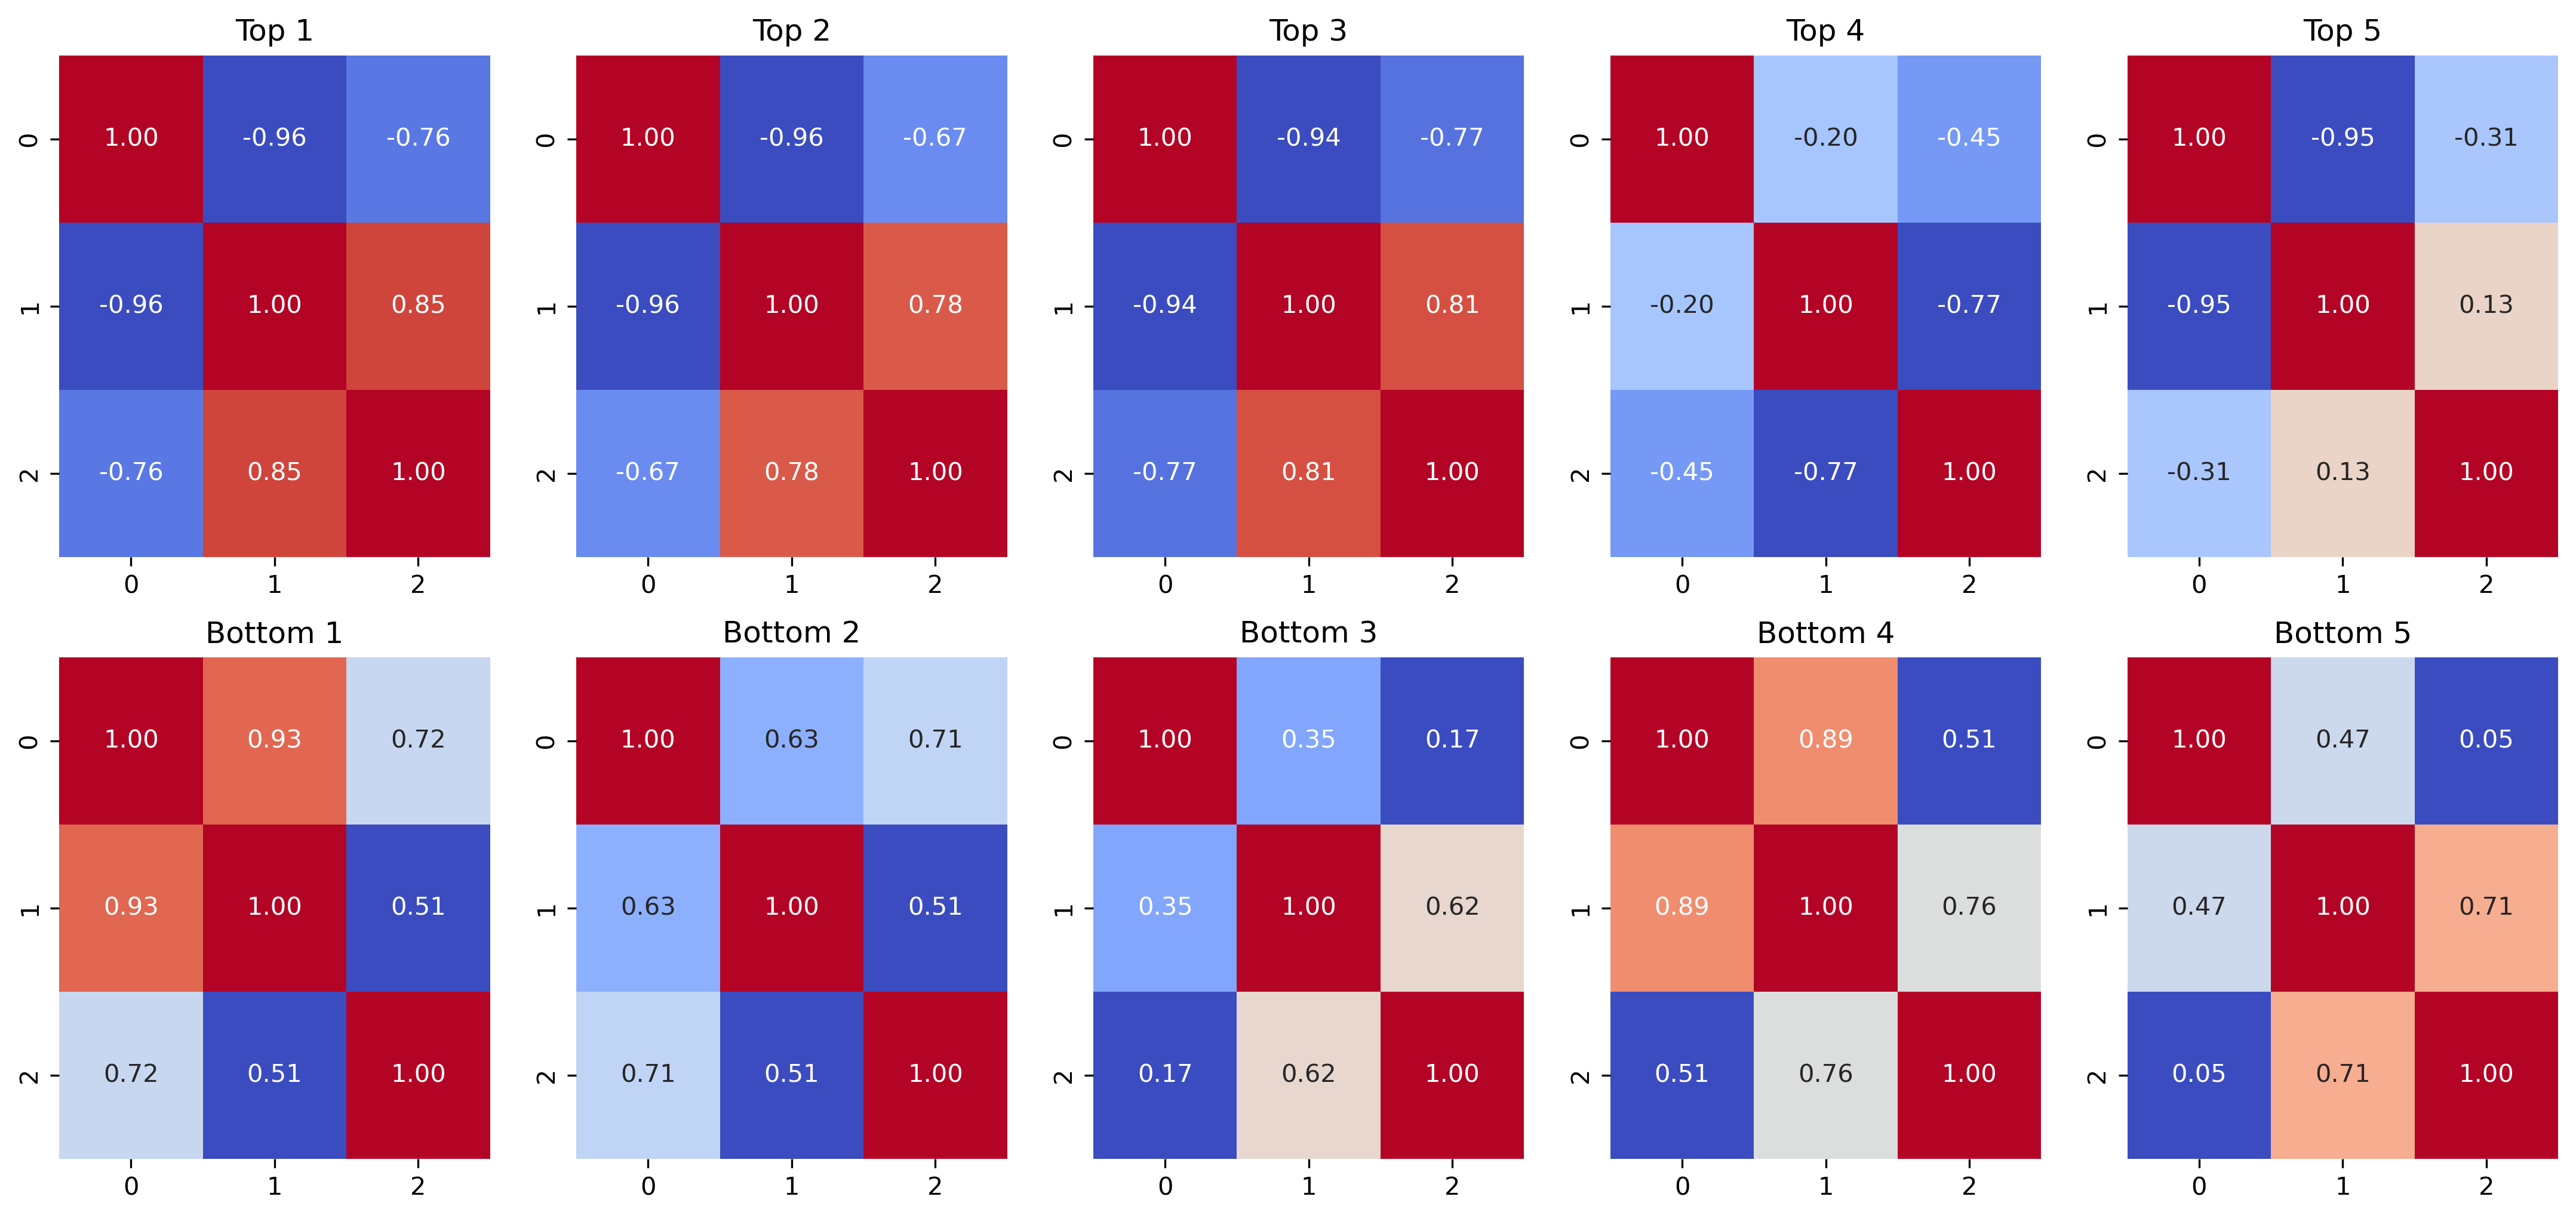

In [ ]:
# plot the top 5 and bottom 5 degradation matrices
fig, axs = plt.subplots(2, 5, figsize=(18, 8), dpi = 300)
for i in range(5):
    sns.heatmap(top_5_degradation_mateix[i], ax=axs[0, i], annot=True, fmt=".2f", cmap='coolwarm', cbar=False)
    # add the title top1 to top5
    axs[0, i].set_title(f'Top {i+1}')
    sns.heatmap(bottom_5_degradation_mateix[i], ax=axs[1, i], annot=True, fmt=".2f", cmap='coolwarm', cbar=False)
    # add the title bottom1 to bottom5
    axs[1, i].set_title(f'Bottom {i+1}')


In [91]:
# get the 1st principle direction of the top 10 degradation matrices
top_10_degradation_mateix_eigvec = []
bottom_10_degradation_mateix_eigvec = []

for matrix in top_10_degradation_mateix:
    eig_val, eig_vec = np.linalg.eig(matrix)
    # get the max eigenvalue and the corresponding eigenvector
    max_eig_val_idx = np.argmax(eig_val)
    max_eig_val = eig_val[max_eig_val_idx]
    max_eig_vec = eig_vec[:, max_eig_val_idx]
    top_10_degradation_mateix_eigvec.append(max_eig_vec)
    
for matrix in bottom_10_degradation_mateix:
    eig_val, eig_vec = np.linalg.eig(matrix)
    # get the max eigenvalue and the corresponding eigenvector
    max_eig_val_idx = np.argmax(eig_val)
    max_eig_val = eig_val[max_eig_val_idx]
    max_eig_vec = eig_vec[:, max_eig_val_idx]
    bottom_10_degradation_mateix_eigvec.append(max_eig_vec)

(array([ 3., 10.,  2.,  1.,  7.,  4.,  9.,  5.,  2.,  2.]),
 array([-0.50694167, -0.40717493, -0.30740819, -0.20764146, -0.10787472,
        -0.00810798,  0.09165875,  0.19142549,  0.29119223,  0.39095896,
         0.4907257 ]),
 <BarContainer object of 10 artists>)

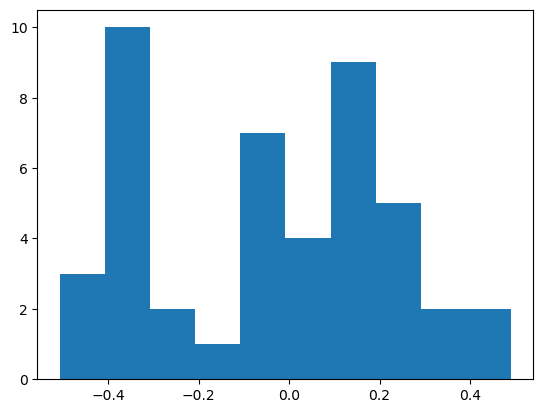

In [92]:
# calculate the distribution of the dot product of the 1st principle direction of the top 10 degradation matrices with the 1st principle direction of the bottom 10 degradation matrices
dot_product_list = []
for i in range(10):
    for j in range(i+1, 10):
        dot_product = np.dot(top_10_degradation_mateix_eigvec[i], bottom_10_degradation_mateix_eigvec[j])
        dot_product_list.append(dot_product)

plt.hist(dot_product_list, bins=10)